# Deep Learning for Text 🌐
## Chapter 11 Deep Learning Book
This file contains my learning of modren architecute for processing text using deep learning for text classification, text generation. 

### Technologies to Learn
* Text Vectorization Layer
* N-Gram
* Sequence to Sequence Model
* Transformers 🤖
    * Encoder
    * Decoder


### Initaial Steps for Text Data Processing
1. Standardization --> the text to make it easier to process, such as by converting it to lowercase or removing punctuation.
2. Tokenization --> split the text into units (called tokens), such as characters, words, or groups of words. This is called tokenization.
3. Indexing -->  convert each such token into a numerical vector. This will usually involve first indexing all tokens present in the data.

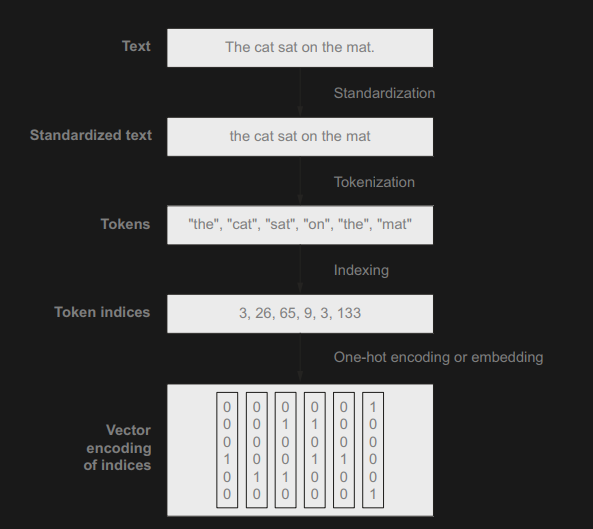

## Methods for Text Tokenization 🪙
1. Word-Level Tokenization
2. N-gram Tokenization 
3. Character-Level Tokenization ( rarely used )

In general, you’ll always use either word-level or N-gram tokenization. There are two kinds of text-processing models: those that care about word order, called "sequence models", and those that treat input words as a set, discarding their original order, called "bag-of-words models".
<br>
* If you’re building a sequence model, you’ll use "word-level" tokenization.
* If you’re building a bag-of-words model, you’ll use "N-gram tokenization".

## Method for Indexing
After tokenization we have to convert text data into numerical form so that i can be understand by computer. 
For this we can use 
1. Basic state less method like each word will have index of the length of whole text.
2. Text Vectorization Layer


#### Scratch code of text vectorization Layer

In [13]:
import string
class Vectorizer:
    def standardize(self,text):
       text = text.lower()
       return "".join(char for char in text if char not in string.punctuation) 

    def token(self, text):
        text = self.standardize(text)
        return text.split()

    def make_vocab(self, dataset):
        self.vocabulary = {"" : 0 ,'[UNK]':1}
        for text in dataset:
            text = self.standardize(text)
            tokens = self.token(text)

            for token in tokens:
                if token not in self.vocabulary:
                    self.vocabulary[token] = len(self.vocabulary)
        
        self.inverse_vocabulary = dict((v,k) for k, v in self.vocabulary.items())


    def encode(self, text):
        text = self.standardize(text)
        tokens = self.token(text)
        return [self.vocabulary.get(token,1) for token in tokens]
    
    def decode(self, int_sequence):
        return " ".join(self.inverse_vocabulary.get(i,"[UNK]" )for i in int_sequence)


vector = Vectorizer()
dataset = [
"I write, erase, rewrite",
"Erase again, and then",
"A poppy blooms.",
]
vector.make_vocab(dataset)

In [14]:
test_sentence = "I write, rewrite, and still rewrite again"
encoded_sentence = vector.encode(test_sentence)
print(encoded_sentence)
decoded_sentence = vector.decode(encoded_sentence)
print(decoded_sentence)



[2, 3, 5, 7, 1, 5, 6]
i write rewrite and [UNK] rewrite again


### Same but using Text Vector layer from keras

In [1]:
import tensorflow as tf 
import re
import string
from tensorflow.keras.layers import  TextVectorization
text_vectorication = TextVectorization

In [17]:
def custom_stan(string_tensor):
    lowercase = tf.strings.lower(string_tensor)
    return tf.strings.regex_replace(lowercase,f"[{re.escape(string.punctuation)}]","")

def custom_split_fn(string_tensor):
    return tf.strings.split(string_tensor)

text_vectorication = TextVectorization(
    output_mode = 'int',
    standardize = custom_stan,
    split = custom_split_fn
)

In [18]:
dataset = [
"I write, erase, rewrite",
"Erase again, and then",
"A poppy blooms.",
]

text_vectorication.adapt(dataset)

Function to retrive vocabulary

In [19]:
text_vectorication.get_vocabulary()

['',
 '[UNK]',
 'erase',
 'write',
 'then',
 'rewrite',
 'poppy',
 'i',
 'blooms',
 'and',
 'again',
 'a']

# IMDB Movie Review Classification 🎥
### Using IMDB for applying all the latest deep learning concepts

In [4]:
import os

Data is already downloaded

In [5]:
BASE_DIR = 'data'

In [6]:
train_file_path = BASE_DIR + "/train"
val_file_path = BASE_DIR + "/val"
test_file_path = BASE_DIR + "/test"

In [5]:
print(len(os.listdir(train_file_path+"/pos")),len(os.listdir(train_file_path+"/neg")))
print(len(os.listdir(val_file_path+'/pos')), len(os.listdir(val_file_path+'/neg')))
print(len(os.listdir(test_file_path+'/pos')),len(os.listdir(test_file_path+'/neg')))

10000 10000
2500 2500
12500 12500


### Data Pre-processing

In [7]:
from tensorflow import keras
batch_size = 32

#### Fetching using text_dataset_from_directory like image_dataset_from_directory

In [8]:
train_ds = keras.utils.text_dataset_from_directory(
    train_file_path, batch_size= batch_size)

val_ds = keras.utils.text_dataset_from_directory(
    val_file_path, batch_size= batch_size)

test_ds = keras.utils.text_dataset_from_directory(
    test_file_path, batch_size= batch_size)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


#### Displaying the shapes and dtypes of the first batch

In [20]:
for inputs, targets in train_ds:
    print("inputs shape", inputs.shape)
    print("inputs data types", inputs.dtype)
    print("target shapes", targets.shape)
    print('target data type' , targets.dtype)
    print("input 1" , inputs[0])
    print("targets 1" , targets[0])
    break
    

inputs shape (32,)
inputs data types <dtype: 'string'>
target shapes (32,)
target data type <dtype: 'int32'>
input 1 tf.Tensor(b'If the term itself were not geographically and semantically meaningless, one might well refer to "Ned Kelly" as an "Australian Western." For the people Down Under, Ned Kelly was, apparently, a folk hero bandit akin to Robin Hood, Jesse James, Bonnie and Clyde, and Butch Cassidy and the Sundance Kid. The descendant of Irish immigrants, Kelly became a fugitive and an outlaw after he was falsely accused of shooting an Australian law officer, a crime for which his equally innocent mother was put into prison. To get back at the government for this mistreatment, Kelly, his brother Dan, and two other companions, became notorious bank robbers, winning over the hearts of many people in the countryside while striking a blow for justice in a land where Irish immigrants were often treated with disrespect and disdain by those who ran the country.<br /><br />Perhaps becaus

## Processing Words as a set 
### The bag-of-words approach 🧳

#### Uisng UniGram with Binary Encoding
First, let’s process our raw text datasets with a TextVectorization layer so that they yield multi-hot encoded binary word vectors. Our layer will only look at single
words (that is to say, unigrams).

In [24]:
text_vectorication = TextVectorization(
    max_tokens = 20000, # limiting the vocab to 20,000 most frequent words
    output_mode = 'multi_hot' # encode the output tokens as multi-hot binary vectors
)

text_only_train_ds = train_ds.map(lambda x, y : x)
text_vectorication.adapt(text_only_train_ds)


In [25]:
binary_1gram_train_ds = train_ds.map(
    lambda x, y : (text_vectorication(x), y), num_parallel_calls = 5
)

In [26]:
binary_1gram_val_ds = val_ds.map(
    lambda x, y : (text_vectorication(x), y), num_parallel_calls = 5
)

In [27]:
binary_1gram_test_ds = test_ds.map(
    lambda x, y : (text_vectorication(x), y), num_parallel_calls = 5
)

#### inspecting the output

In [12]:
for inputs, targets in binary_1gram_train_ds:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])
    print("targets[0]:", targets[0])
    print('Lenght og the input array is',len(inputs[0])    )
    break

inputs.shape: (32, 20000)
inputs.dtype: <dtype: 'float32'>
targets.shape: (32,)
targets.dtype: <dtype: 'int32'>
inputs[0]: tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(20000,), dtype=float32)
targets[0]: tf.Tensor(0, shape=(), dtype=int32)
Lenght og the input array is 20000


#### Building the Model with Binary-Ngram

In [13]:
from tensorflow.keras import  layers
def get_model (max_tokens =20000, hidden_dim = 16):
    inputs = keras.Input(shape=(max_tokens,))
    x = layers.Dense(hidden_dim, activation = 'relu')(inputs)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(1, activation = 'sigmoid')(x)
    model = keras.Model(inputs,outputs)

    # compiling
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy',
    metrics = ['accuracy'])

    return model

#### Trainig the Model 🚂

In [14]:
uni_gram_model = get_model()
uni_gram_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense (Dense)               (None, 16)                320016    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________


In [15]:
callbacks = [keras.callbacks.ModelCheckpoint("binary_1gram.keras",save_best_only=True)]


In [21]:
history = uni_gram_model.fit(binary_1gram_train_ds.cache(),
                    validation_data = binary_1gram_val_ds.cache(),
                    epochs = 10,
                    callbacks = callbacks)


Epoch 1/10
625/625 [==============================] - 17s 25ms/step - loss: 0.3977 - accuracy: 0.8349 - val_loss: 0.3028 - val_accuracy: 0.8800
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2652 - accuracy: 0.9022 - val_loss: 0.3041 - val_accuracy: 0.8858
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2419 - accuracy: 0.9167 - val_loss: 0.3229 - val_accuracy: 0.8898
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2277 - accuracy: 0.9252 - val_loss: 0.3384 - val_accuracy: 0.8894
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2122 - accuracy: 0.9300 - val_loss: 0.3560 - val_accuracy: 0.8888
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2205 - accuracy: 0.9296 - val_loss: 0.3698 - val_accuracy: 0.8860
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2165 - accuracy: 0.9316 - val_loss: 0.3738 - val_accuracy: 0.8866
Epoc

#### Visulizing the Results

In [73]:
import matplotlib.pyplot as plt

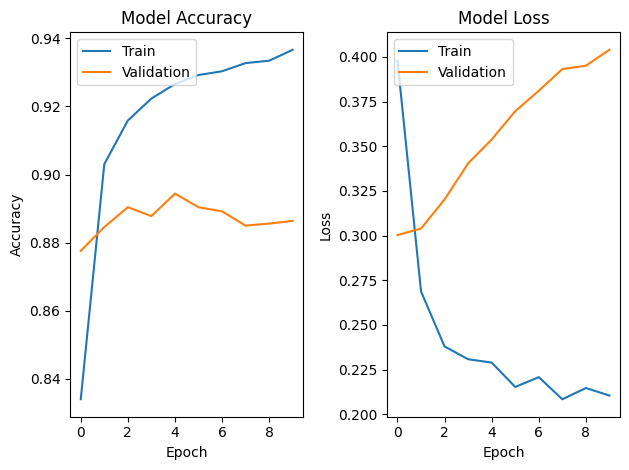

In [74]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [71]:
model = keras.models.load_model("binary_1gram.keras")
print(f"Test acc: {model.evaluate(binary_1gram_test_ds)[1]:.3f}")

782/782 [==============================] - 23s 28ms/step - loss: 0.2923 - accuracy: 0.8874
Test acc: 0.887


 Accuracy of Uni-Gram Model is 88.7%


### Using Bi-Gram Approach 
As is unigram, there is no information about the relevence of words, so now using Bi-Gram Approach


##### Text Layer for bi-gram

In [78]:
bi_gram_text_vector_layer = TextVectorization(
    ngrams = 2,
    max_tokens = 20000,
    output_mode = 'multi_hot'
)

### Preparing Data on Bi-gram

In [79]:
bi_gram_text_vector_layer.adapt(text_only_train_ds)

In [80]:
binary_2gram_train_ds = train_ds.map(lambda x, y : (bi_gram_text_vector_layer(x),y), num_parallel_calls=5)

binary_2gram_val_ds = val_ds.map(lambda x, y : (bi_gram_text_vector_layer(x),y), num_parallel_calls=5)

binary_2gram_test_ds = test_ds.map(lambda x, y : (bi_gram_text_vector_layer(x),y), num_parallel_calls=5)

In [82]:
bi_grma_model = get_model()
bi_grma_model.summary()

callbacks = [
    keras.callbacks.ModelCheckpoint("binary_2gram.keras",
save_best_only=True)
]

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense_10 (Dense)            (None, 16)                320016    
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________


### Training on bi-gram model

In [83]:
bi_grma_model.fit(binary_2gram_train_ds.cache(),
    validation_data = binary_2gram_val_ds.cache(),
    epochs = 10,
    callbacks = callbacks)

Epoch 1/10
625/625 [==============================] - 5s 7ms/step - loss: 0.3823 - accuracy: 0.8421 - val_loss: 0.2883 - val_accuracy: 0.8880
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2378 - accuracy: 0.9154 - val_loss: 0.2984 - val_accuracy: 0.8920
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2031 - accuracy: 0.9308 - val_loss: 0.3101 - val_accuracy: 0.8910
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.1953 - accuracy: 0.9383 - val_loss: 0.3416 - val_accuracy: 0.8914
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.1848 - accuracy: 0.9452 - val_loss: 0.3425 - val_accuracy: 0.8910
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1785 - accuracy: 0.9478 - val_loss: 0.3553 - val_accuracy: 0.8862
Epoch 7/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1647 - accuracy: 0.9519 - val_loss: 0.3698 - val_accuracy: 0.8890
Epoch 

### Accuracy of Bi_gram Model

In [84]:
print(f"Test Accuracy of B-Gram Model is -- > {bi_grma_model.evaluate(binary_2gram_test_ds)[1]:.3f}")

782/782 [==============================] - 14s 17ms/step - loss: 0.3790 - accuracy: 0.8918
Test Accuracy of B-Gram Model is -- > 0.892


## Using TF-IDF along with BiGrams 📊🔍
You can also add a bit more information to this representation by counting how many times each word or N-gram occurs. But as lot of un-important words like "a" an "or" would get more attention instead of important words. 

<br>So, to handel this we can use "TF-IDF approach "

#### Configuring TextVectorization to return TF-IDF-weighted outputs

In [86]:
text_vector_tf_idf = TextVectorization(
    ngrams = 2,
    max_tokens = 20000,
    output_mode = 'tf_idf'
)

Processing Data with Tf-IDF Vector layer

In [87]:
text_vector_tf_idf.adapt(text_only_train_ds)

In [89]:
tf_idf_2gram_train = train_ds.map(lambda x, y : (text_vector_tf_idf(x),y),
num_parallel_calls = 5)

tf_idf_2gram_val = val_ds.map(lambda x, y : (text_vector_tf_idf(x),y),
num_parallel_calls = 5)

tf_idf_2gram_test = test_ds.map(lambda x, y : (text_vector_tf_idf(x),y),
num_parallel_calls = 5)



Training on Tf-idf model

In [90]:
tf_idf_model = get_model()
callbacks = [
keras.callbacks.ModelCheckpoint("tfidf_2gram.keras",
save_best_only=True)
]

tf_idf_model.summary()


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense_12 (Dense)            (None, 16)                320016    
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________


In [91]:
tf_idf_model.fit(tf_idf_2gram_train,
                validation_data = tf_idf_2gram_val,
                epochs = 10,
                callbacks = callbacks)

Epoch 1/10
625/625 [==============================] - 5s 8ms/step - loss: 0.5167 - accuracy: 0.7322 - val_loss: 0.3131 - val_accuracy: 0.8792
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 0.3844 - accuracy: 0.8127 - val_loss: 0.3060 - val_accuracy: 0.8806
Epoch 3/10
625/625 [==============================] - 5s 7ms/step - loss: 0.3569 - accuracy: 0.8298 - val_loss: 0.3434 - val_accuracy: 0.8516
Epoch 4/10
625/625 [==============================] - 10s 16ms/step - loss: 0.3280 - accuracy: 0.8463 - val_loss: 0.3559 - val_accuracy: 0.8658
Epoch 5/10
625/625 [==============================] - 13s 21ms/step - loss: 0.3089 - accuracy: 0.8584 - val_loss: 0.3264 - val_accuracy: 0.8926
Epoch 6/10
625/625 [==============================] - 12s 20ms/step - loss: 0.2906 - accuracy: 0.8714 - val_loss: 0.3430 - val_accuracy: 0.8854
Epoch 7/10
625/625 [==============================] - 12s 19ms/step - loss: 0.2808 - accuracy: 0.8727 - val_loss: 0.3521 - val_accuracy: 0.876

### Accuracy of Tf-idf model

In [94]:
print(f'Test Accuracy of Tf-idf Model -->{tf_idf_model.evaluate(tf_idf_2gram_test)[1]*100:.3f}%')

782/782 [==============================] - 4s 5ms/step - loss: 0.3417 - accuracy: 0.8614
Test Accuracy of Tf-idf Model -->86.136%


## Exporting the Model that process raw string

In [96]:
inputs = keras.Input(shape=(1,),dtype = 'string')
processed_input = text_vector_tf_idf(inputs)
outputs = tf_idf_model(processed_input)
inference_model = keras.Model(inputs,outputs)

In [115]:
raw_text_data = tf.convert_to_tensor([["Jawan tries to deliver an engaging action experience but falls short due to its convoluted plot and shallow characters. Despite Shah Rukh Khan's star power, the film is weighed down by clichés and predictable twists. The pacing drags at times, making even the action sequences feel tedious. Important social issues are touched upon but lack depth and nuance. Overall, Jawan misses the mark, leaving viewers unsatisfied and yearning for a more coherent story."]])
raw_text_data

<tf.Tensor: shape=(1, 1), dtype=string, numpy=
array([[b"Jawan tries to deliver an engaging action experience but falls short due to its convoluted plot and shallow characters. Despite Shah Rukh Khan's star power, the film is weighed down by clich\xc3\xa9s and predictable twists. The pacing drags at times, making even the action sequences feel tedious. Important social issues are touched upon but lack depth and nuance. Overall, Jawan misses the mark, leaving viewers unsatisfied and yearning for a more coherent story."]],
      dtype=object)>

In [116]:
predictions = inference_model(raw_text_data)
print(f"{float(predictions[0] * 100):.2f} percent positive")

6.67 percent positive


### Making a gradio interface for N-Gram Models

In [32]:
import gradio as gr

c:\Users\M_ros\anaconda3\envs\tf2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
def unigram(text):
    inputs = keras.Input(shape=(1,),dtype = 'string')
    processed_input = text_vectorication(inputs)
    model = keras.models.load_model("binary_1gram.keras")
    outputs = model(processed_input)
    inference_model = keras.Model(inputs,outputs)
    predictions = inference_model(text)
    return f"{float(predictions[0]*100):.2f}% positive"
    

def bi_gram_model_process(text):
    inputs = keras.Input(shape=(1,),dtype = 'string')
    processed_input = bi_gram_text_vector_layer(inputs)
    model = keras.models.load_model("binary_2gram.keras")
    outputs = model(processed_input)
    inference_model = keras.Model(inputs,outputs)
    predictions = inference_model(text)
    return f"{float(predictions[0]*100):.2f}% positive"
    
def tfidf_model_process(text):
    inputs = keras.Input(shape=(1,),dtype = 'string')
    processed_input = text_vector_tf_idf(inputs)
    model = keras.models.load_model("tfidf_2gram.keras")
    outputs = model(processed_input)
    inference_model = keras.Model(inputs,outputs)
    predictions = inference_model(text)
    return f"{float(predictions[0]*100):.2f}% positive"
    

# Define function to process input based on selected option
def process_text(text, option):
    raw_text_data = tf.convert_to_tensor([[text]])

    if option == "UniGram Model":
        return unigram(raw_text_data)
    elif option == "BiGram Model":
        return bi_gram_model_process(raw_text_data)
    elif option == "BiGram with TFIDF":
        return tfidf_model_process(raw_text_data)

# Create Gradio interface
with gr.Blocks() as interface:
    gr.Markdown("# IMDB Review Classification")
    text_input = gr.Textbox(label="Enter Review")
    radio = gr.Radio(["UniGram Model", "BiGram Model", "BiGram with TFIDF"], label="Choose a Model 🧰")
    text_output = gr.Textbox(label="Prediction")
    
    # Button to trigger the processing
    button = gr.Button("Submit")
    button.click(process_text, inputs=[text_input, radio], outputs=text_output)

# Launch the interface
interface.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


## End of N-Gram Appraoch

## Sequence-Sequence Approach
As from previous examples, it is avident that word order matters. So, without manually handling this we can just use deep learning for this. 

<br>
Instead of
manually crafting order-based features, we exposed the model to raw word sequences
and let it figure out such features on its own? This is what sequence models are about.

#### Steps to Implement
To implement a sequence model, you’d start by
1. representing your input samples assequences of integer indices (one integer standing for one word). 
2. Then, you’d map each integer to a vector to obtain vector sequences. 
3. Finally, you’d feed these sequences of vectors into a stack of layers that could cross-correlate features from adjacent vectors, such as a 1D convnet, a RNN, or a Transformer.


For this model we will use "Bi-Directioal RNN "

### First Sequence-Sequence Model


#### Preparing Data

In [6]:
from tensorflow.keras import  layers
from tensorflow import keras

In [7]:
batch_size_for_sequence_ = 32

In [8]:
train_ds2 = keras.utils.text_dataset_from_directory(
    train_file_path, batch_size= batch_size_for_sequence_)

val_ds2 = keras.utils.text_dataset_from_directory(
    val_file_path, batch_size= batch_size_for_sequence_)

test_ds2 = keras.utils.text_dataset_from_directory(
    test_file_path, batch_size= batch_size_for_sequence_)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


In [9]:
text_vectorication = TextVectorization(
    max_tokens = 15000, # limiting the vocab to 20,000 most frequent words
    output_mode = 'multi_hot' # encode the output tokens as multi-hot binary vectors
)

text_only_train_ds = train_ds2.map(lambda x, y : x)
text_vectorication.adapt(text_only_train_ds)


In [10]:
max_length = 400
max_tokens = 15000

sequence_sequence_vector = TextVectorization(
    max_tokens = max_tokens,
    output_mode = 'int',
    output_sequence_length= max_length,
)

In [11]:
sequence_sequence_vector.adapt(text_only_train_ds)

In [12]:
int_train_ds = train_ds2.map(lambda x, y:( sequence_sequence_vector(x),y ), num_parallel_calls=5)

int_val_ds = val_ds2.map(lambda x, y:( sequence_sequence_vector(x),y ), num_parallel_calls=5)

int_test_ds = test_ds2.map(lambda x, y:( sequence_sequence_vector(x),y ), num_parallel_calls=5)

#### Lets Make a Model
The simplest way to convert our integer sequences to vector
sequences is to one-hot encode the integers (each dimension would represent one
possible term in the vocabulary). On top of these one-hot vectors, we’ll add a simple
bidirectional LSTM.

In [13]:
inputs = keras.Input(shape=(None,), dtype= 'int64')
embedded =tf.one_hot(inputs ,  depth= max_tokens)

x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation = 'sigmoid')(x)
sequence_model = keras.Model(inputs, outputs)

sequence_model.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])


In [14]:
sequence_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 tf.one_hot (TFOpLambda)     (None, None, 15000)       0         
                                                                 
 bidirectional (Bidirectiona  (None, 64)               3848448   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 3,848,513
Trainable params: 3,848,513
Non-trainable params: 0
___________________________________________________

train

In [15]:
callbacks = [
keras.callbacks.ModelCheckpoint("one_hot_bidir_lstm.keras",
save_best_only=True)
]

In [16]:
sequence_model.fit( int_test_ds.cache(),
                 validation_data= int_val_ds.cache(),
                 epochs= 10 , 
                 callbacks= callbacks)

Epoch 1/10
782/782 [==============================] - 106s 127ms/step - loss: 0.4825 - accuracy: 0.7846 - val_loss: 0.5536 - val_accuracy: 0.7992
Epoch 2/10
782/782 [==============================] - 80s 102ms/step - loss: 0.3111 - accuracy: 0.8859 - val_loss: 0.3639 - val_accuracy: 0.8742
Epoch 3/10
782/782 [==============================] - 78s 100ms/step - loss: 0.2565 - accuracy: 0.9089 - val_loss: 0.9780 - val_accuracy: 0.8076
Epoch 4/10
782/782 [==============================] - 79s 101ms/step - loss: 0.2255 - accuracy: 0.9211 - val_loss: 0.4334 - val_accuracy: 0.8670
Epoch 5/10
782/782 [==============================] - 80s 102ms/step - loss: 0.1947 - accuracy: 0.9316 - val_loss: 0.5411 - val_accuracy: 0.8652
Epoch 6/10
782/782 [==============================] - 80s 103ms/step - loss: 0.1776 - accuracy: 0.9398 - val_loss: 0.4954 - val_accuracy: 0.8662
Epoch 7/10
782/782 [==============================] - 91s 116ms/step - loss: 0.1693 - accuracy: 0.9429 - val_loss: 0.4339 - val_a

Accuracy of the Sequence to Sequence Model


In [17]:
print(f"Test acc of Sequence to Sequence Model is: {sequence_model.evaluate(int_test_ds)[1]*100:.3f}")

782/782 [==============================] - 63s 79ms/step - loss: 0.0844 - accuracy: 0.9714
Test acc of Sequence to Sequence Model is: 97.144


##### observations
A first observation: this model trains very slowly, especially compared to the lightweight model of the previous section. This is because our inputs are quite large.it doesn’t perform nearly as well as our (very fast) binary unigram model.
<br><br>
Note: Also the model did not work with same token size and number of tokens on my computer

## Uee of Embedding
### Reasons and Working
in sequence to sequence model, our input sequences
are full of zeros. and they do not have semantic relationships.
Word embeddings are vector representations of words that achieve exactly this: they map human language into a structured geometric space.
<br><br>
Whereas the vectors obtained through one-hot encoding are binary, sparse (mostly
made of zeros), and very high-dimensional (the same dimensionality as the number of
words in the vocabulary), word embeddings are low-dimensional floating-point vectors
(that is, dense vectors, as opposed to sparse vectors)

<br>
So, word embeddings pack more information into
far fewer dimensions.


<br><br>
Besides being dense representations, word embeddings are also "structured representations", and their structure is learned from data. Similar words get embedded in close
locations, and further, specific directions in the embedding space are meaningful. To
make this clearer, let’s look at a concrete example.

#### 2 Ways to use Embeddings
1. Learn Embeddings jointly with the main model. . In this setup, you start with random word vectors and then learn word vectors in the same way you learn the weights of a neural network.

2. Pretrained_embeddings --> Load into your model word embeddings that were precomputed using a different machine learning task than the one you’re trying to solve. These are called pretrained word embeddings.

#### understanding of Embedding Layer

The Embedding layer is best understood as a dictionary that maps integer indices (which stand for specific words) to dense vectors. It takes integers as input, looks up these integers in an internal dictionary, and returns the associated vectors. 
<br><br>
The Embedding layer takes as input a rank-2 tensor of integers, of shape (batch_size, sequence_length), where each entry is a sequence of integers. The layer then returns a 3D floating-point tensor of shape (batch_size, sequence_length, embedding_dimensionality). 
<br><br>When you instantiate an Embedding layer, its weights (its internal dictionary of token vectors) are initially random, just as with any other layer. During training, these word vectors are gradually adjusted via backpropagation, structuring the space into something the downstream model can exploit. Once fully trained, the embedding space will show a lot of structure—a kind of structure specialized for the specific problem for which you’re training your model

### Making Modeling using Embedding Layer trained from scratch

In [78]:
max_length = 600
max_tokens = 20000

embedding_from_scratch_vector = TextVectorization(
    max_tokens = max_tokens,
    output_mode = 'int',
    output_sequence_length= max_length,
)

In [79]:
embedding_from_scratch_vector.adapt(text_only_train_ds)

In [28]:
int_train_ds = train_ds.map(lambda x, y:( sequence_sequence_vector(x),y ), num_parallel_calls=5)

int_val_ds = val_ds.map(lambda x, y:( sequence_sequence_vector(x),y ), num_parallel_calls=5)

int_test_ds = test_ds.map(lambda x, y:( sequence_sequence_vector(x),y ), num_parallel_calls=5)

In [29]:
inputs = keras.Input(shape=(None,), dtype="int64")

embedded = layers.Embedding(input_dim=max_tokens, output_dim=256)(inputs)

x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
embedding_model = keras.Model(inputs, outputs)


In [30]:
embedding_model.compile(optimizer="rmsprop", 
                        loss="binary_crossentropy",
                        metrics=["accuracy"])   

embedding_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 256)         5120000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               73984     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,194,049
Trainable params: 5,194,049
Non-trainable params: 0
_________________________________________________

In [25]:
callbacks = [
keras.callbacks.ModelCheckpoint("embeddings_bidir_gru.keras",
save_best_only=True)
]


In [31]:
embedding_model.fit(int_train_ds,
                    validation_data = int_val_ds,
                    epochs = 10,
                    callbacks = callbacks)

Epoch 1/10
625/625 [==============================] - 40s 59ms/step - loss: 0.4853 - accuracy: 0.7852 - val_loss: 0.4887 - val_accuracy: 0.7950
Epoch 2/10
625/625 [==============================] - 55s 88ms/step - loss: 0.3140 - accuracy: 0.8853 - val_loss: 0.3757 - val_accuracy: 0.8642
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2549 - accuracy: 0.9093 - val_loss: 0.3379 - val_accuracy: 0.8678
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.2071 - accuracy: 0.9259 - val_loss: 0.3778 - val_accuracy: 0.8734
Epoch 5/10
625/625 [==============================] - 76s 122ms/step - loss: 0.1716 - accuracy: 0.9423 - val_loss: 0.3621 - val_accuracy: 0.8692
Epoch 6/10
625/625 [==============================] - 55s 88ms/step - loss: 0.1366 - accuracy: 0.9543 - val_loss: 0.4687 - val_accuracy: 0.8302
Epoch 7/10
625/625 [==============================] - 71s 113ms/step - loss: 0.1138 - accuracy: 0.9627 - val_loss: 0.4116 - val_accur

Evaluating the model

In [34]:
m = keras.models.load_model("embeddings_bidir_gru.keras")
print(f"Test acc of Embedding Model is: {m.evaluate(int_test_ds)[1]*100:.3f} %")

782/782 [==============================] - 68s 86ms/step - loss: 0.3663 - accuracy: 0.8513
Test acc of Embedding Model is: 85.128 %


##### Observations
the model with embeddings trains much faster then one-hot model, since the LSTM only has to process 256 dimensions rather than 20,000. 
##### Accuracy 
This model is around 85% accurate which is less than "Bigram model" (89%). Because, bigram model was looking at full reviews but here we are restricting our model to just 600 words. 
##### Reason
1. The input sequences are full of zeros. so for reviews larger than 600 words will be truncated to 600 words and reviews smaller than 600 words will be padding to make them contiguous.
2. As RNN, looks at the tokens in their natural order will spend its last iterations seeing only vectors that encode padding—possibly for several hundreds of iterations if the original sentence was short. The information stored in the internal state of the RNN will gradually fade out as it gets exposed to these meaningless inputs.


#### Soultion 
##### Masking API
* We need to tell RNN to skip the zeros in the iterations. using "masking" API. 
* The Embedding layer is capable of generating a “mask” that corresponds to its input data. 
* By default, this option isn’t active—you can turn it on by passing mask_zero=True to your Embedding layer. 

##### Retrival of Mask
we can get the mask using compute_mask() function


In [36]:
emb = layers.Embedding(input_dim = 10 , output_dim = 256, mask_zero = True )

In [42]:
some_input = [[4,4,5,6,8,9,3,0,0],[1,2,3,4,5,6,0,0,7],[0,0,0,0,0,00,00,0,0]]
ma = emb.compute_mask(some_input)

In [43]:
ma

<tf.Tensor: shape=(3, 9), dtype=bool, numpy=
array([[ True,  True,  True,  True,  True,  True,  True, False, False],
       [ True,  True,  True,  True,  True,  True, False, False,  True],
       [False, False, False, False, False, False, False, False, False]])>

### Model using Mask 

In [45]:
inputs = keras.Input(shape=(None,),dtype='int64')

embedded = layers.Embedding(input_dim = max_tokens, output_dim = 256, mask_zero = True)(inputs)

x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation = 'sigmoid')(x)

embedding_with_mask_model = keras.Model(inputs, outputs)

In [46]:
embedding_with_mask_model.compile(optimizer='rmsprop',
                                    loss = 'binary_crossentropy',
                                    metrics = ['accuracy'])

In [47]:
embedding_with_mask_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_4 (Embedding)     (None, None, 256)         5120000   
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               73984     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,194,049
Trainable params: 5,194,049
Non-trainable params: 0
_________________________________________________

In [48]:
callbacks = [keras.callbacks.ModelCheckpoint("embedding_bidir_gru_with_masking.keras",save_best_only=True)]

In [49]:
embedding_with_mask_model.fit(int_train_ds, validation_data= int_val_ds, epochs=10 , callbacks= callbacks)

Epoch 1/10
625/625 [==============================] - 65s 96ms/step - loss: 0.4016 - accuracy: 0.8147 - val_loss: 0.3570 - val_accuracy: 0.8386
Epoch 2/10
625/625 [==============================] - 38s 61ms/step - loss: 0.2407 - accuracy: 0.9069 - val_loss: 0.2837 - val_accuracy: 0.8812
Epoch 3/10
625/625 [==============================] - 40s 65ms/step - loss: 0.1773 - accuracy: 0.9359 - val_loss: 0.2977 - val_accuracy: 0.8864
Epoch 4/10
625/625 [==============================] - 39s 62ms/step - loss: 0.1324 - accuracy: 0.9538 - val_loss: 0.3289 - val_accuracy: 0.8838
Epoch 5/10
625/625 [==============================] - 40s 64ms/step - loss: 0.1022 - accuracy: 0.9638 - val_loss: 0.4203 - val_accuracy: 0.8696
Epoch 6/10
625/625 [==============================] - 52s 82ms/step - loss: 0.0784 - accuracy: 0.9732 - val_loss: 0.4701 - val_accuracy: 0.8572
Epoch 7/10
625/625 [==============================] - 83s 132ms/step - loss: 0.0561 - accuracy: 0.9812 - val_loss: 0.4316 - val_accuracy

In [51]:
mo2 = keras.models.load_model("embedding_bidir_gru_with_masking.keras")
print(f"Test Accuracy of Embedding with masking model is {mo2.evaluate(int_test_ds)[1]*100:.2f}%")

782/782 [==============================] - 25s 30ms/step - loss: 0.3021 - accuracy: 0.8725
Test Accuracy of Embedding with masking model is 87.25%


### Using Pre-trained Embeddings
Like computer vision we can use pre-trained image processing weights when data is not enough, we can also use pre-trained weights for text as well called "Pre-trained Word Embeddings"
<h4>Glove Word Embeddings </h4>

##### Parsing the GloVe Word Embeddings File

In [53]:
import numpy as np
path_of_glove_file = 'glove.6B\glove.6B.100d.txt'

In [57]:
embeddings_index = {}
with open(path_of_glove_file) as f:
    for line in f:
        word , coefs = line.split(maxsplit = 1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

In [59]:
print(f"Found {len(embeddings_index)} word vectors.")

Found 400000 word vectors.


In [74]:

first_key = next(iter(embeddings_index))
print(first_key)
embeddings_index['king'].shape

the


(100,)

#### Building an embedding Matrix, 
which can be load into Embedding Layer. 
##### Shape of Matrix == (max_words, embedding_dim)

In [77]:
embedding_from_scratch_vector.get_vocabulary()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 0: unexpected end of data

In [76]:
embedding_dim = 100

## retrice the vocabulary indexed by our previous text vectorization layer

vocabulary = text_vectorication.get_vocabulary()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 0: unexpected end of data